<center> <h1>PREDICIÓN DEL SUEÑO CON MLP BINARIO</h1> </center>
<center> <h4>Noemi González, Roberto Holgado y Carmen Plaza seco</h4> </center>


###### Indice

En este jupyter notebook se lleva a cabo la construcción de un clasificador MLP de salida binaria para predecir el el estado de vigilia o sueño ligero y  el de sueño profundo.

    1. Clasficador MLP binario
        1.1 Preparación datos de entrada y salida
        1.2 Creación del modelo y selección parámetros libres
        1.3 Evaluación del modelo
        1.4 Visualización de resultados

In [1]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
import sklearn

## 1. CLASIFICADOR MLP BINARIO

Se ha utilizado un perceptrón multicapa para clasificar la vigilia o sueño ligero del sueño profundo. Es decir, se ha construido un clasificador con salida binaria.

### 1.1 Preparación datos de entrada y salida

In [2]:
Train_bin= pd.read_csv('Train.csv')
Test_bin= pd.read_csv('Test.csv')

In [3]:
X_train_bin=Train_bin.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1) 
y_train_bin=Train_bin['Etiquetas binarias']

X_test_bin=Test_bin.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1)
y_test_bin=Test_bin['Etiquetas binarias']

### 1.2  Creación del modelo y selección parámetros libres

Se proponen posibles valores de neuronas en la capa oculta para ver con cuál de ellos se obtienen las mejores prestaciones para el modelo. Se crea una tabla que recoge la pérdidas para cada valor del número de neuronas y aquel que tenga menos pérdida es el que se utilizará para el conjunto de test.

Se estudia el número de neuronas para un rango de 4 a 20 cogiendo los valores con saltos de 3.

In [4]:
# Tabla para recoger las prestaciones en train 
columns  = ['Loss','Score']
comp_train = pd.DataFrame(columns=columns)


In [5]:
# Número de neuronas de la capa oculta
n_hidden=range(4,20,3)

for i in n_hidden:
    
    print('\033[4;32m' + 'MLP clasiffier with',i,'neurons in the hidden layer' + '\033[0m')

    model=MLPClassifier(activation='relu', batch_size=50, hidden_layer_sizes=(i,), learning_rate='constant',
        learning_rate_init=0.1, shuffle=True, solver='sgd', early_stopping=True, verbose=True, n_iter_no_change=5)

    model.fit(X_train_bin, y_train_bin)
    
    loss=model.loss_  
    comp_train = comp_train.set_value(i,('Loss','Score'),(loss,'Verbose'))

MLP clasiffier with 4 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.708333
Iteration 2, loss = 0.72539802
Validation score: 0.708333
Iteration 3, loss = 0.72538523
Validation score: 0.708333
Iteration 4, loss = 0.72666813
Validation score: 0.708333
Iteration 5, loss = 0.72683255
Validation score: 0.708333
Iteration 6, loss = 0.72525695
Validation score: 0.708333
Iteration 7, loss = 0.72573215
Validation score: 0.708333
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
MLP clasiffier with 7 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.708333
Iteration 2, loss = 0.81594008
Validation score: 0.708333
Iteration 3, loss = 0.81596858
Validation score: 0.708333
Iteration 4, loss = 0.81626709
Validation score: 0.708333
Iteration 5, loss = 0.81625095
Validation score: 0.708333
Iteration 6, loss = 0.81502636
Validation score: 0.708333
Iteration 7, loss = 0.81479758
Validation score: 0.708333
Validation

C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Validation score: 0.708333
Iteration 7, loss = 0.77045265
Validation score: 0.708333
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
MLP clasiffier with 13 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.708333
Iteration 2, loss = 0.65402277
Validation score: 0.708333
Iteration 3, loss = 0.65508549
Validation score: 0.708333
Iteration 4, loss = 0.65375537
Validation score: 0.708333
Iteration 5, loss = 0.65356007
Validation score: 0.708333
Iteration 6, loss = 0.65287364
Validation score: 0.708333
Iteration 7, loss = 0.65350301
Validation score: 0.708333
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.
MLP clasiffier with 16 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.708333
Iteration 2, loss = 0.66281837
Validation score: 0.708333
Iteration 3, loss = 0.66471274
Validation score: 0.708333
Iteration 4, loss = 0.66379765
Validation score: 0.708333
Itera

C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


Las medidas de prestación elegidas para la elección de una topología han sido el validation score y la pérdida. Ambas se pueden ver al aplicar el fit del modelo, gracias al parámetro verbose=True. La pérdida la hemos añadido a la siguiente tabla pero la accuracy de cada epoch para el conjunto de validación hay que verla en la celda anterior. Según estos resultados, la mejor topología de MLP sería la de **n_hidden con 4 neuronas** en la capa oculta, ya que el par (loss,val_score) es el mejor.
En todos los casos el valor 'validation score' está entorno a 0.5, pero el número de neuronas de menor pérdida es 4.

In [6]:
comp_train

,Loss,Score
4,0.725732,Verbose
7,0.814798,Verbose
10,0.770453,Verbose
13,0.653503,Verbose
16,0.664022,Verbose
19,0.880896,Verbose


### 1.3 Evaluación del modelo

Testeamos el modelo con el número de neuronas en la capa oculta que ofrece la menor pérdida (número neuronas = 4)

In [7]:
columns  = ['Accuracy','Recall','F1-score']
comp_test = pd.DataFrame(columns=columns)

print('\033[4;32m' + 'MLP clasiffier with 4 neurons in the hidden layer' + '\033[0m')

model=MLPClassifier(activation='relu', batch_size=50, hidden_layer_sizes=4, learning_rate='constant',
        learning_rate_init=0.1, shuffle=True, solver='sgd', early_stopping=True, verbose=True, n_iter_no_change=5)

model.fit(X_train_bin,y_train_bin)

predictions = model.predict(X_test_bin)
cr=classification_report(y_test_bin,predictions,output_dict=True)
acc,rec,f1=cr['weighted avg']['precision'],cr['weighted avg']['recall'],cr['weighted avg']['f1-score']

comp_test = comp_test.set_value('4', ('Accuracy','Recall','F1-score'),(acc,rec,f1))

MLP clasiffier with 4 neurons in the hidden layer
Iteration 1, loss = 1.23828677
Validation score: 0.708333
Iteration 2, loss = 0.61103390
Validation score: 0.708333
Iteration 3, loss = 0.61069985
Validation score: 0.708333
Iteration 4, loss = 0.61183084
Validation score: 0.708333
Iteration 5, loss = 0.61129897
Validation score: 0.708333
Iteration 6, loss = 0.61046484
Validation score: 0.708333
Iteration 7, loss = 0.61132375
Validation score: 0.708333
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


C:\Users\rober\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rober\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


In [8]:
comp_test

,Accuracy,Recall,F1-score
4,0.466294,0.682857,0.554169


In [9]:
print("================Classification Report=================")
print(cr)

================Classification Report=================
{'0.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 222}, '1.0': {'precision': 0.6828571428571428, 'recall': 1.0, 'f1-score': 0.8115449915110357, 'support': 478}, 'accuracy': 0.6828571428571428, 'macro avg': {'precision': 0.3414285714285714, 'recall': 0.5, 'f1-score': 0.4057724957555178, 'support': 700}, 'weighted avg': {'precision': 0.4662938775510204, 'recall': 0.6828571428571428, 'f1-score': 0.55416929420325, 'support': 700}}


### 1.5 Visualización de resultados
A continuación se muestra un ejemplo de las fases del sueño predichas frente a las reales. Para facilitar esta visualización, se muestran la mitad de la muestras del subconjunto de test. 

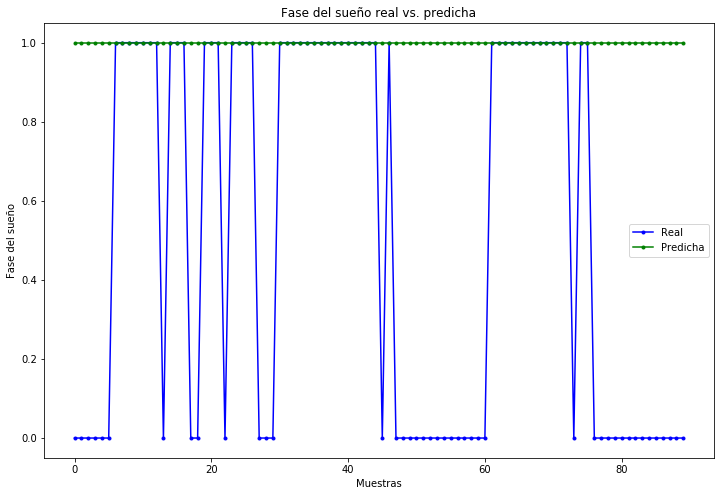

In [10]:
plt.figure(figsize=(12,8))
plt.plot(y_test_bin[0:90],color='blue', marker='.',label='Real')
plt.plot(predictions[0:90],color='green', marker='.',label='Predicha')

plt.title('Fase del sueño real vs. predicha')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()

**Residuos**

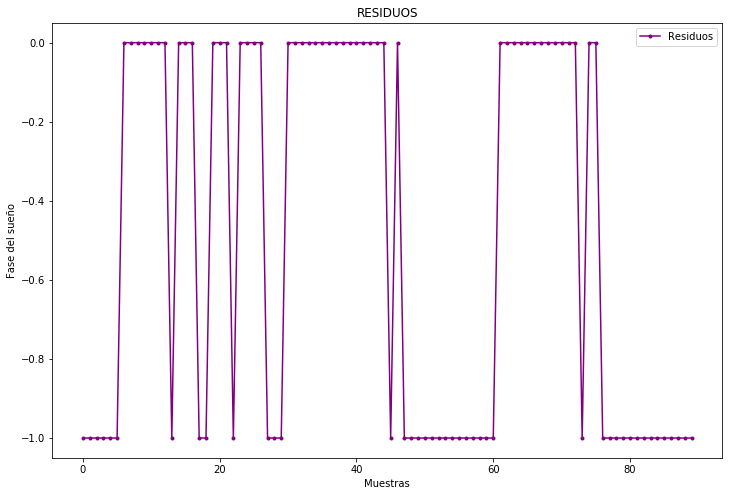

In [11]:
residuos= y_test_bin - predictions
plt.figure(figsize=(12,8))
plt.plot(residuos[0:90],color='purple', marker='.',label='Residuos')

plt.title('RESIDUOS')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()